# Plotting Notebook
This jupyter notebook contains the plotting functionality for PhageScanner. All of the sections in this notebook were used for plotting different results pertaining to the tool. Of note, the imports used in this analysis notebook depend on some of the PhageScanner libraries. Therefore the `environment.yml` should be ran and activated before using this notebook.

In [449]:
import pandas as pd
import sys
from enum import Enum
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [169]:
sys.path.insert(0, '../') # need to reference directory containing modules
from PhageScanner.main.utils import CSVUtils

# File Paths
Change these file paths if wanting to benchmark different output files

In [170]:
class FilePaths(str, Enum):
    """Paths to all of the files used for benchmarking/analysis."""
    # feature testing
    feature_result_path = Path("../results/feature_model_results.csv")
    feature_classnames_path = Path("../results/feature_index2class_name.csv")
    
    # binary classification results
    binary_result_path = Path("../results/binary_model_results.csv")
    binary_classnames_path = Path("../results/binary_index2class_name.csv")
    
    # multiclass classification results
    multiclass_result_path = Path("../results/multiclass_model_results.csv")
    multiclass_classnames_path = Path("../results/multiclass_index2class_name.csv")
    
    # clustering results
    clustering_result_path = Path("../results/result_cluster_ouput.csv")

# Helper methods

In [177]:
# remove gridmarks
sns.set(style="white", palette="pastel", rc={"figure.dpi":300, 'savefig.dpi':300})

In [244]:
shades_of_green = ['#1E5631', 
                    '#A4DE02', 
                    '#76BA1B', 
                    '#4C9A2A', 
                    '#ACDF87', 
                    '#ACDF87', 
                    '#68BB59', 
                    '#00FF7F', 
                    '#9ACD32',
                    '#228B22']

shades_of_green = ["#d0f0c0", "#a3c1ad", "#7bb661", "#5b8a3c", "#3a5f0b", "#234d20", "#173300"]

shades_of_green = [
    '#e2fcd3',
    '#d0f3b1',
    '#bee98f',
    '#a3c35c',
    '#91a33a',
    '#7f8318',
    '#767307',
    '#6d6800',
    '#646300',
    '#5b5e00',
    '#525900',
    '#495400',
    '#404f00',
    '#374a00',
    '#2e4500',
    '#254000',
    '#1c3b00',
    '#133600',
    '#0a3100',
    '#012c00',
    '#002800',
    '#002400',
    '#002000',
    '#001c00',
    '#001800',
    '#001400',
    '#001000',
    '#000c00',
    '#000800',
    '#000400',
    '#000000',
]

# def green_shades(n):
#     return [f"#{'00'*i + 'FF' + '00'*(n-i-1):0>6}" for i in range(n)]

# shades_of_green = green_shades(10)


In [264]:
colors = ["#3db042", "#318d35", "#256a28", "#18461a", "#0c230d"]
def expand_colors(colors, num_intermediate):
    def hex_to_rgb(color):
        return tuple(int(color[i:i+2], 16) for i in (1, 3, 5))

    def rgb_to_hex(color):
        return '#{:02x}{:02x}{:02x}'.format(*color)

    def interpolate(color1, color2, num_intermediate):
        return [tuple(int(color1[i] + j * (color2[i] - color1[i]) / (num_intermediate + 1)) for i in range(3)) for j in range(1, num_intermediate + 1)]

    rgb_colors = [hex_to_rgb(color) for color in colors]

    expanded_colors = []
    for i in range(len(rgb_colors) - 1):
        expanded_colors.append(rgb_to_hex(rgb_colors[i]))
        for intermediate_color in interpolate(rgb_colors[i], rgb_colors[i+1], num_intermediate):
            expanded_colors.append(rgb_to_hex(intermediate_color))

    # Add the last color
    expanded_colors.append(rgb_to_hex(rgb_colors[-1]))

    return expanded_colors


colors = ["#0eff00", "#1fc600", "#089000", "#0a5d00", "#063b00"]
num_intermediate = 2
shades_of_green = expand_colors(colors, num_intermediate)

# Plot feature comparisons

In [529]:
# data maniputation - open dataframes
feature_results_df = CSVUtils.csv_to_dataframe(FilePaths.feature_result_path)
index2class = CSVUtils.csv_to_dataframe(FilePaths.feature_classnames_path)

# select for newest datatime
feature_results_df['datetime'] = pd.to_datetime(feature_results_df['datetime'])
feature_results_df = feature_results_df[feature_results_df['datetime'] == feature_results_df['datetime'].max()]
del feature_results_df['datetime']

# turn tab seperates columns into arrays
feature_results_df['f1score'] = feature_results_df['f1score'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['precision'] = feature_results_df['precision'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['recall'] = feature_results_df['recall'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['features'] = feature_results_df['features'].str.replace('\t', "; ")

# create index to class map
del index2class["datetime"]
index2class = {int(k): v[0] for k, v in index2class.items()}

# add classes as a list
feature_results_df['classes'] = [list(index2class.values())]*len(feature_results_df)

# Flatten the lists
df_exploded = feature_results_df.apply(lambda x: x.explode()).reset_index(drop=True)

df_exploded = df_exploded.sort_values('accuracy', ascending=False)

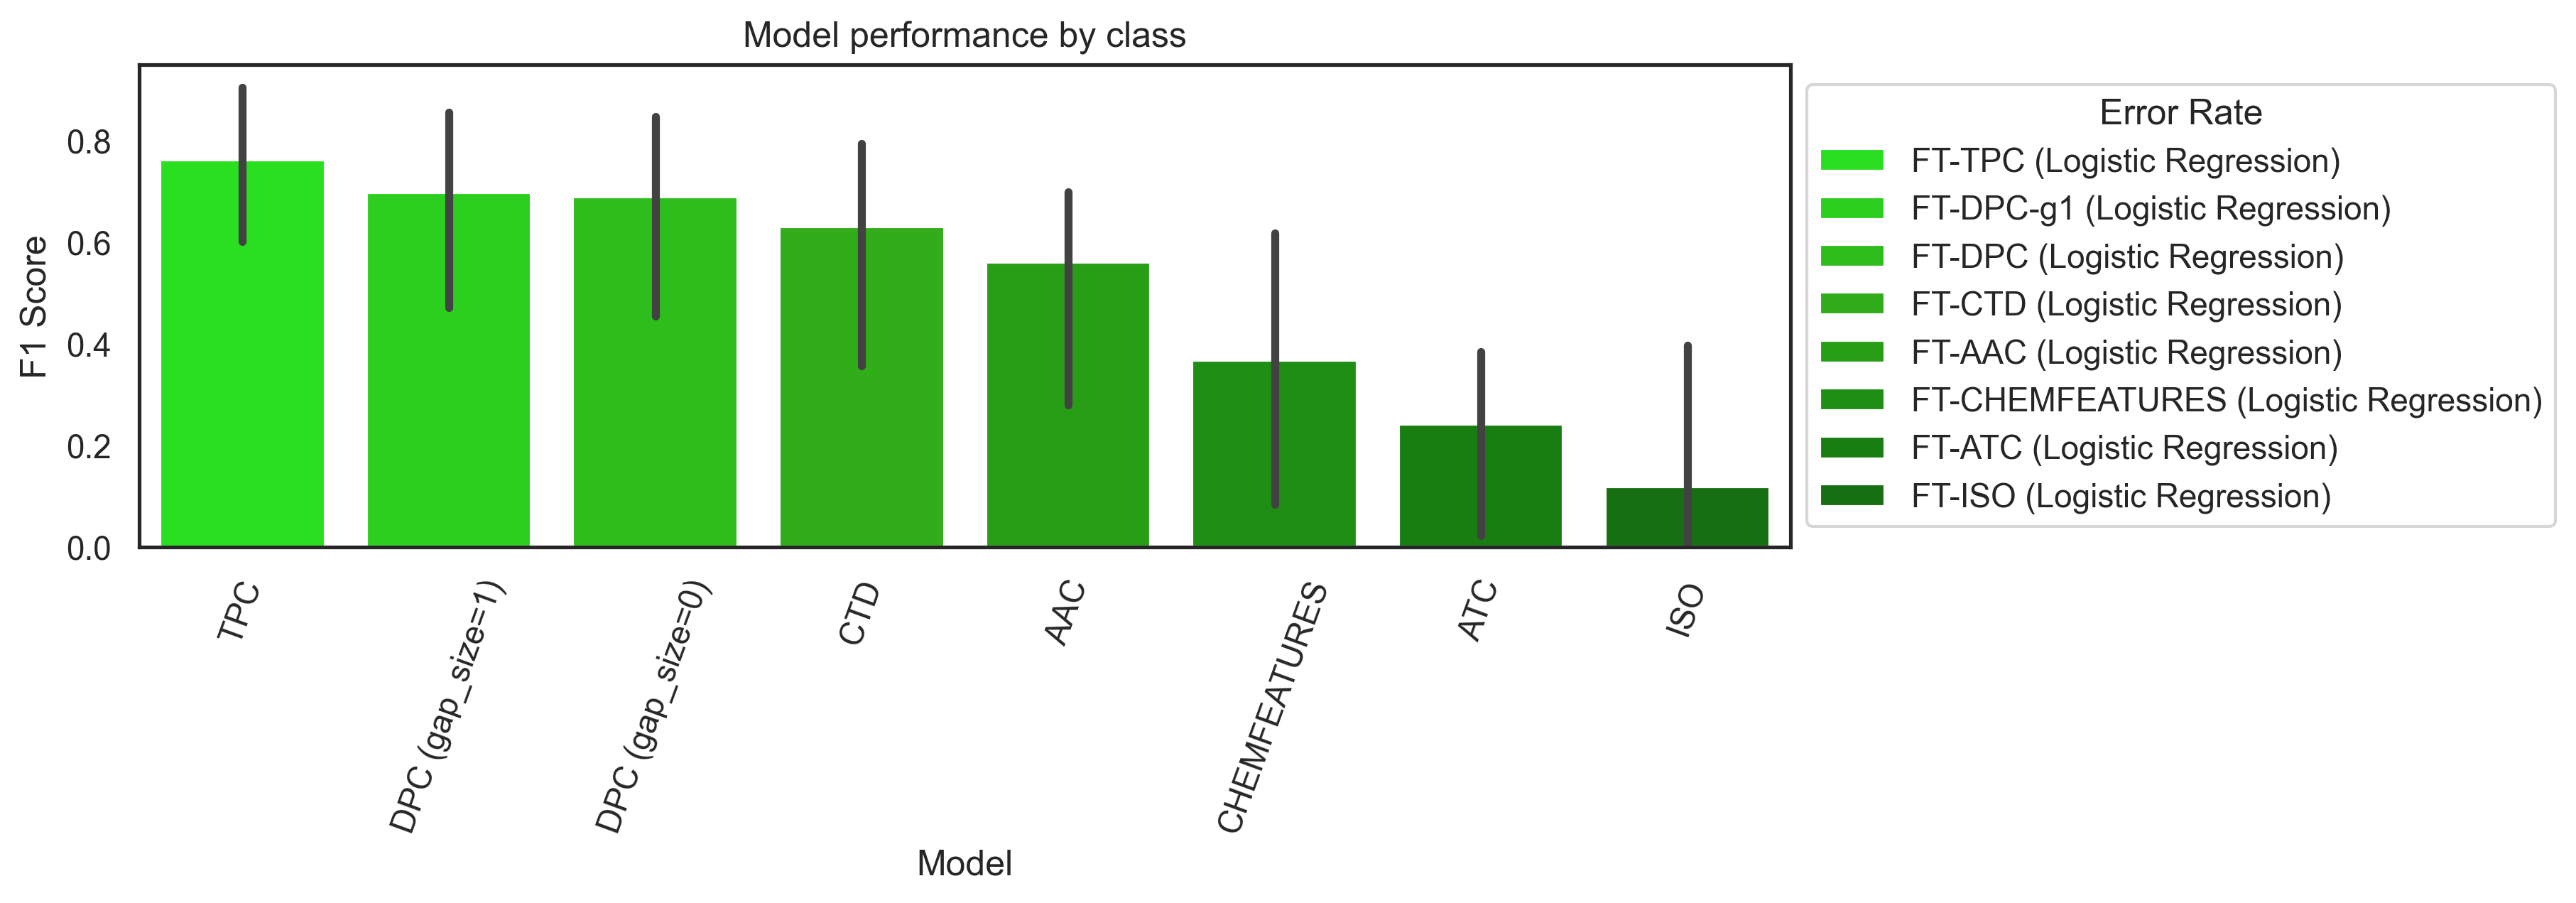

In [531]:
# Plotting
plt.figure(figsize=(10, 3))

# Create barplot
ax = sns.barplot(x='features', y='f1score', errorbar='pi', hue='model', dodge=False, data=df_exploded, palette=shades_of_green)

plt.title('Model performance by class')
plt.ylabel('F1 Score')
plt.xlabel('Model')
ax.xaxis.set_tick_params(rotation=70)
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")
plt.show()

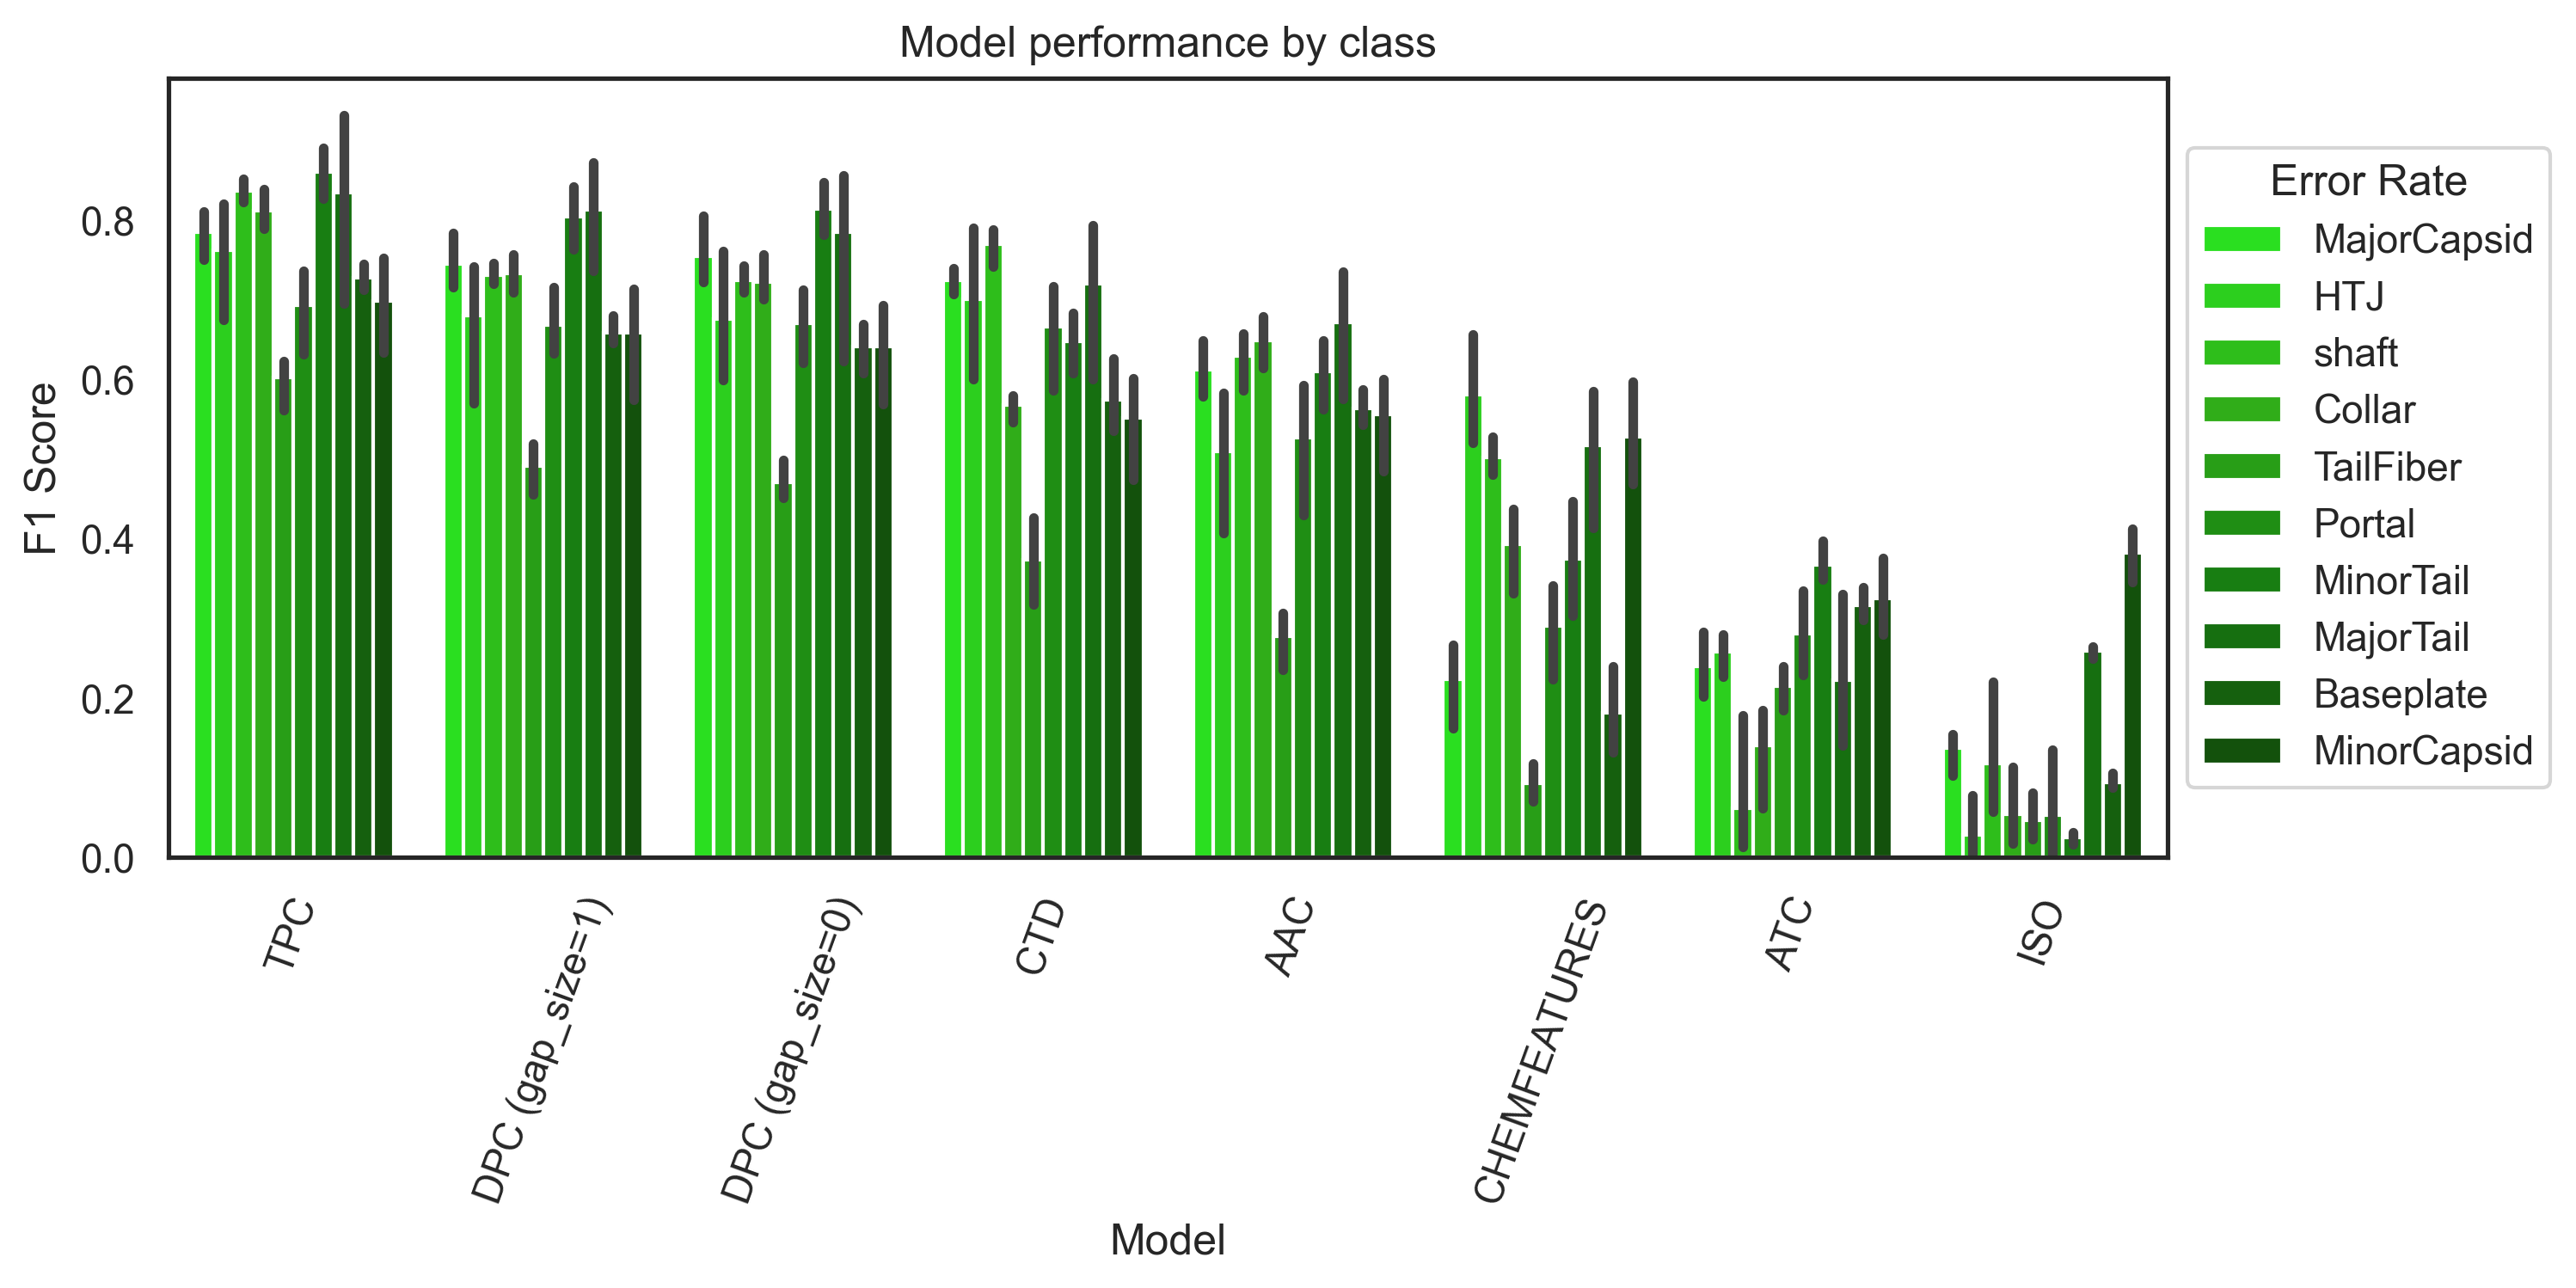

In [366]:
# Plotting
plt.figure(figsize=(10, 4))

# Create barplot
ax = sns.barplot(x='features', y='f1score', hue='classes', errorbar='pi', data=df_exploded, palette=shades_of_green)

plt.title('Model performance by class')
plt.ylabel('F1 Score')
plt.xlabel('Model')
ax.xaxis.set_tick_params(rotation=70)
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")
plt.show()

In [338]:
# Assuming df is your DataFrame and 'column_to_group' is the column you want to group by
grouped_df = df_exploded.groupby(['model', 'features']).max()  # replace .mean() with any other aggregation function as needed

del grouped_df['kfold_iteration']
# Now you can save it to a CSV file
grouped_df #.to_csv('grouped_data.csv')

,,accuracy,f1score,precision,recall,execution_time_seconds,classes
model,features,,,,,,
FT-AAC (Logistic Regression),AAC,0.594,0.739,0.800,0.695,0.002052,shaft
FT-ATC (Logistic Regression),ATC,0.286,0.399,0.709,0.858,0.001611,shaft
FT-CHEMFEATURES (Logistic Regression),CHEMFEATURES,0.418,0.660,0.909,0.564,0.001897,shaft
FT-CTD (Logistic Regression),CTD,0.652,0.797,0.882,0.777,0.004299,shaft
FT-DPC (Logistic Regression),DPC (gap_size=0),0.718,0.858,0.903,0.906,0.012118,shaft
FT-DPC-g1 (Logistic Regression),DPC (gap_size=1),0.728,0.874,0.909,0.878,0.013005,shaft
FT-ISO (Logistic Regression),ISO,0.180,0.414,0.777,0.510,0.001674,shaft
FT-TPC (Logistic Regression),TPC,0.779,0.934,0.913,0.997,0.727826,shaft


# Plot confusion matrix

In [456]:
path_to_confusion = Path("../results/PhageScanner (RNN)_confusion_matrix.csv")
classnames_path = Path("../results/multiclass_index2class_name.csv")

In [473]:
# open confusion matrix
CSVData = open(path_to_confusion)
confusion_matrix = np.loadtxt(CSVData, delimiter=",")

confusion_matrix /= sum(confusion_matrix) 
# create index to class map
index2class = CSVUtils.csv_to_dataframe(classnames_path)
del index2class["datetime"]
classnames = [v[0] for k, v in index2class.items()]

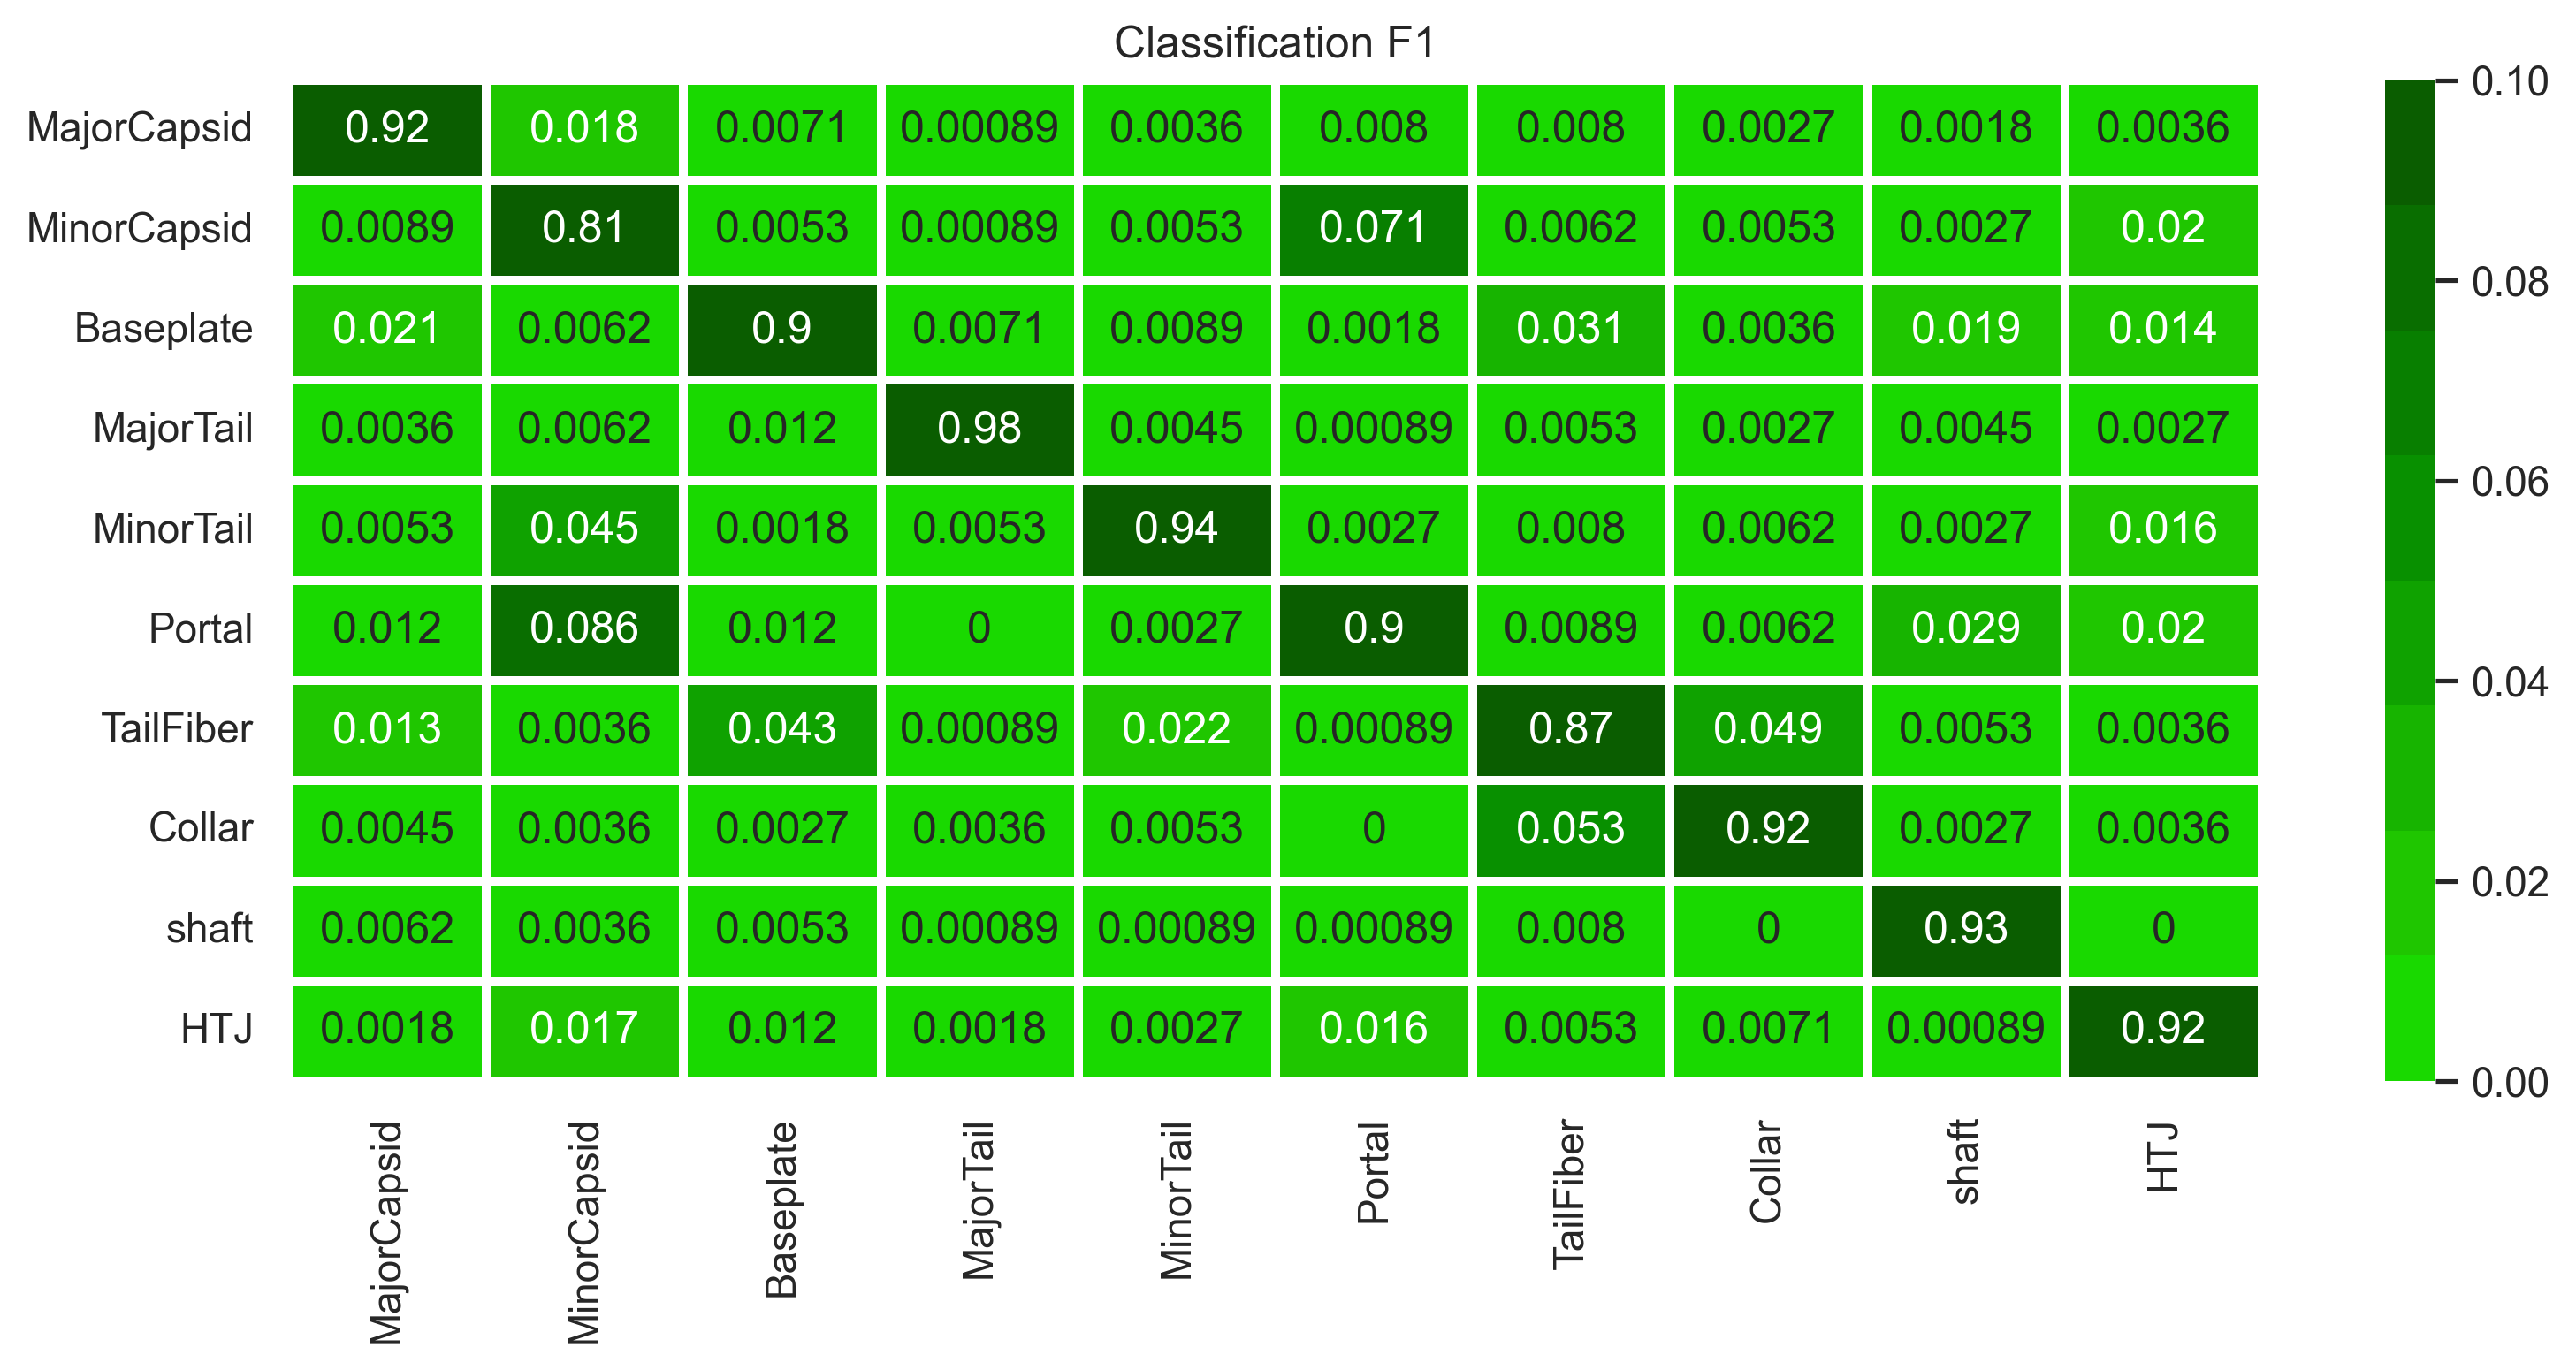

In [499]:
# plotting (classification)
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.heatmap(data=confusion_matrix, annot=True, linewidth=2, vmin=0, vmax=0.1, cmap=shades_of_green[2:10])
ax.set_title("Classification F1")

ax.set_xticks([tick + 0.5 for tick in range(len(classnames))])
ax.set_xticklabels(classnames)
ax.set_yticks([tick + 0.5 for tick in range(len(classnames))])
ax.set_yticklabels(classnames)
ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=0)

plt.show()

# Multiclass/Binary - Plot accuracy and time

In [520]:
# data maniputation - open dataframes
feature_results_df = CSVUtils.csv_to_dataframe(FilePaths.multiclass_result_path)
index2class = CSVUtils.csv_to_dataframe(FilePaths.multiclass_classnames_path)

# feature_results_df = CSVUtils.csv_to_dataframe(FilePaths.binary_result_path)
# index2class = CSVUtils.csv_to_dataframe(FilePaths.binary_classnames_path)

# select for newest datatime
feature_results_df['datetime'] = pd.to_datetime(feature_results_df['datetime'])
feature_results_df = feature_results_df[feature_results_df['datetime'] == feature_results_df['datetime'].max()]
del feature_results_df['datetime']

# turn tab seperates columns into arrays
feature_results_df['f1score'] = feature_results_df['f1score'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['precision'] = feature_results_df['precision'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['recall'] = feature_results_df['recall'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['features'] = feature_results_df['features'].str.replace('\t', "; ")

# create index to class map
del index2class["datetime"]
index2class = {int(k): v[0] for k, v in index2class.items()}

# add classes as a list
feature_results_df['classes'] = [list(index2class.values())]*len(feature_results_df)

# # Flatten the lists
df_exploded = feature_results_df.apply(lambda x: x.explode()).reset_index(drop=True)

# convert to numeric
df_exploded['f1score'] = pd.to_numeric(df_exploded['f1score'])
df_exploded['precision'] = pd.to_numeric(df_exploded['precision'])
df_exploded['recall'] = pd.to_numeric(df_exploded['recall'])

# order by performance
df_exploded = df_exploded.sort_values('f1score', ascending=False)

df_exploded

,model,kfold_iteration,accuracy,f1score,precision,recall,execution_time_seconds,features,classes
3,BLAST,0,0.940,0.994,0.995,0.993,1931.095503,PROTEINSEQ,MajorTail
23,BLAST,2,0.944,0.991,0.993,0.989,1641.314489,PROTEINSEQ,MajorTail
8,BLAST,0,0.940,0.990,0.994,0.986,1931.095503,PROTEINSEQ,shaft
28,BLAST,2,0.944,0.990,0.992,0.988,1641.314489,PROTEINSEQ,shaft
43,BLAST,4,0.949,0.989,0.990,0.988,1785.751823,PROTEINSEQ,MajorTail
...,...,...,...,...,...,...,...,...,...
176,Baseline Classifier (Logistic Regression),2,0.718,0.491,0.382,0.687,0.007029,DPC (gap_size=0),TailFiber
156,Baseline Classifier (Logistic Regression),0,0.692,0.459,0.330,0.754,0.019090,DPC (gap_size=0),TailFiber
186,Baseline Classifier (Logistic Regression),3,0.675,0.454,0.356,0.629,0.006994,DPC (gap_size=0),TailFiber
196,Baseline Classifier (Logistic Regression),4,0.704,0.451,0.315,0.793,0.008496,DPC (gap_size=0),TailFiber


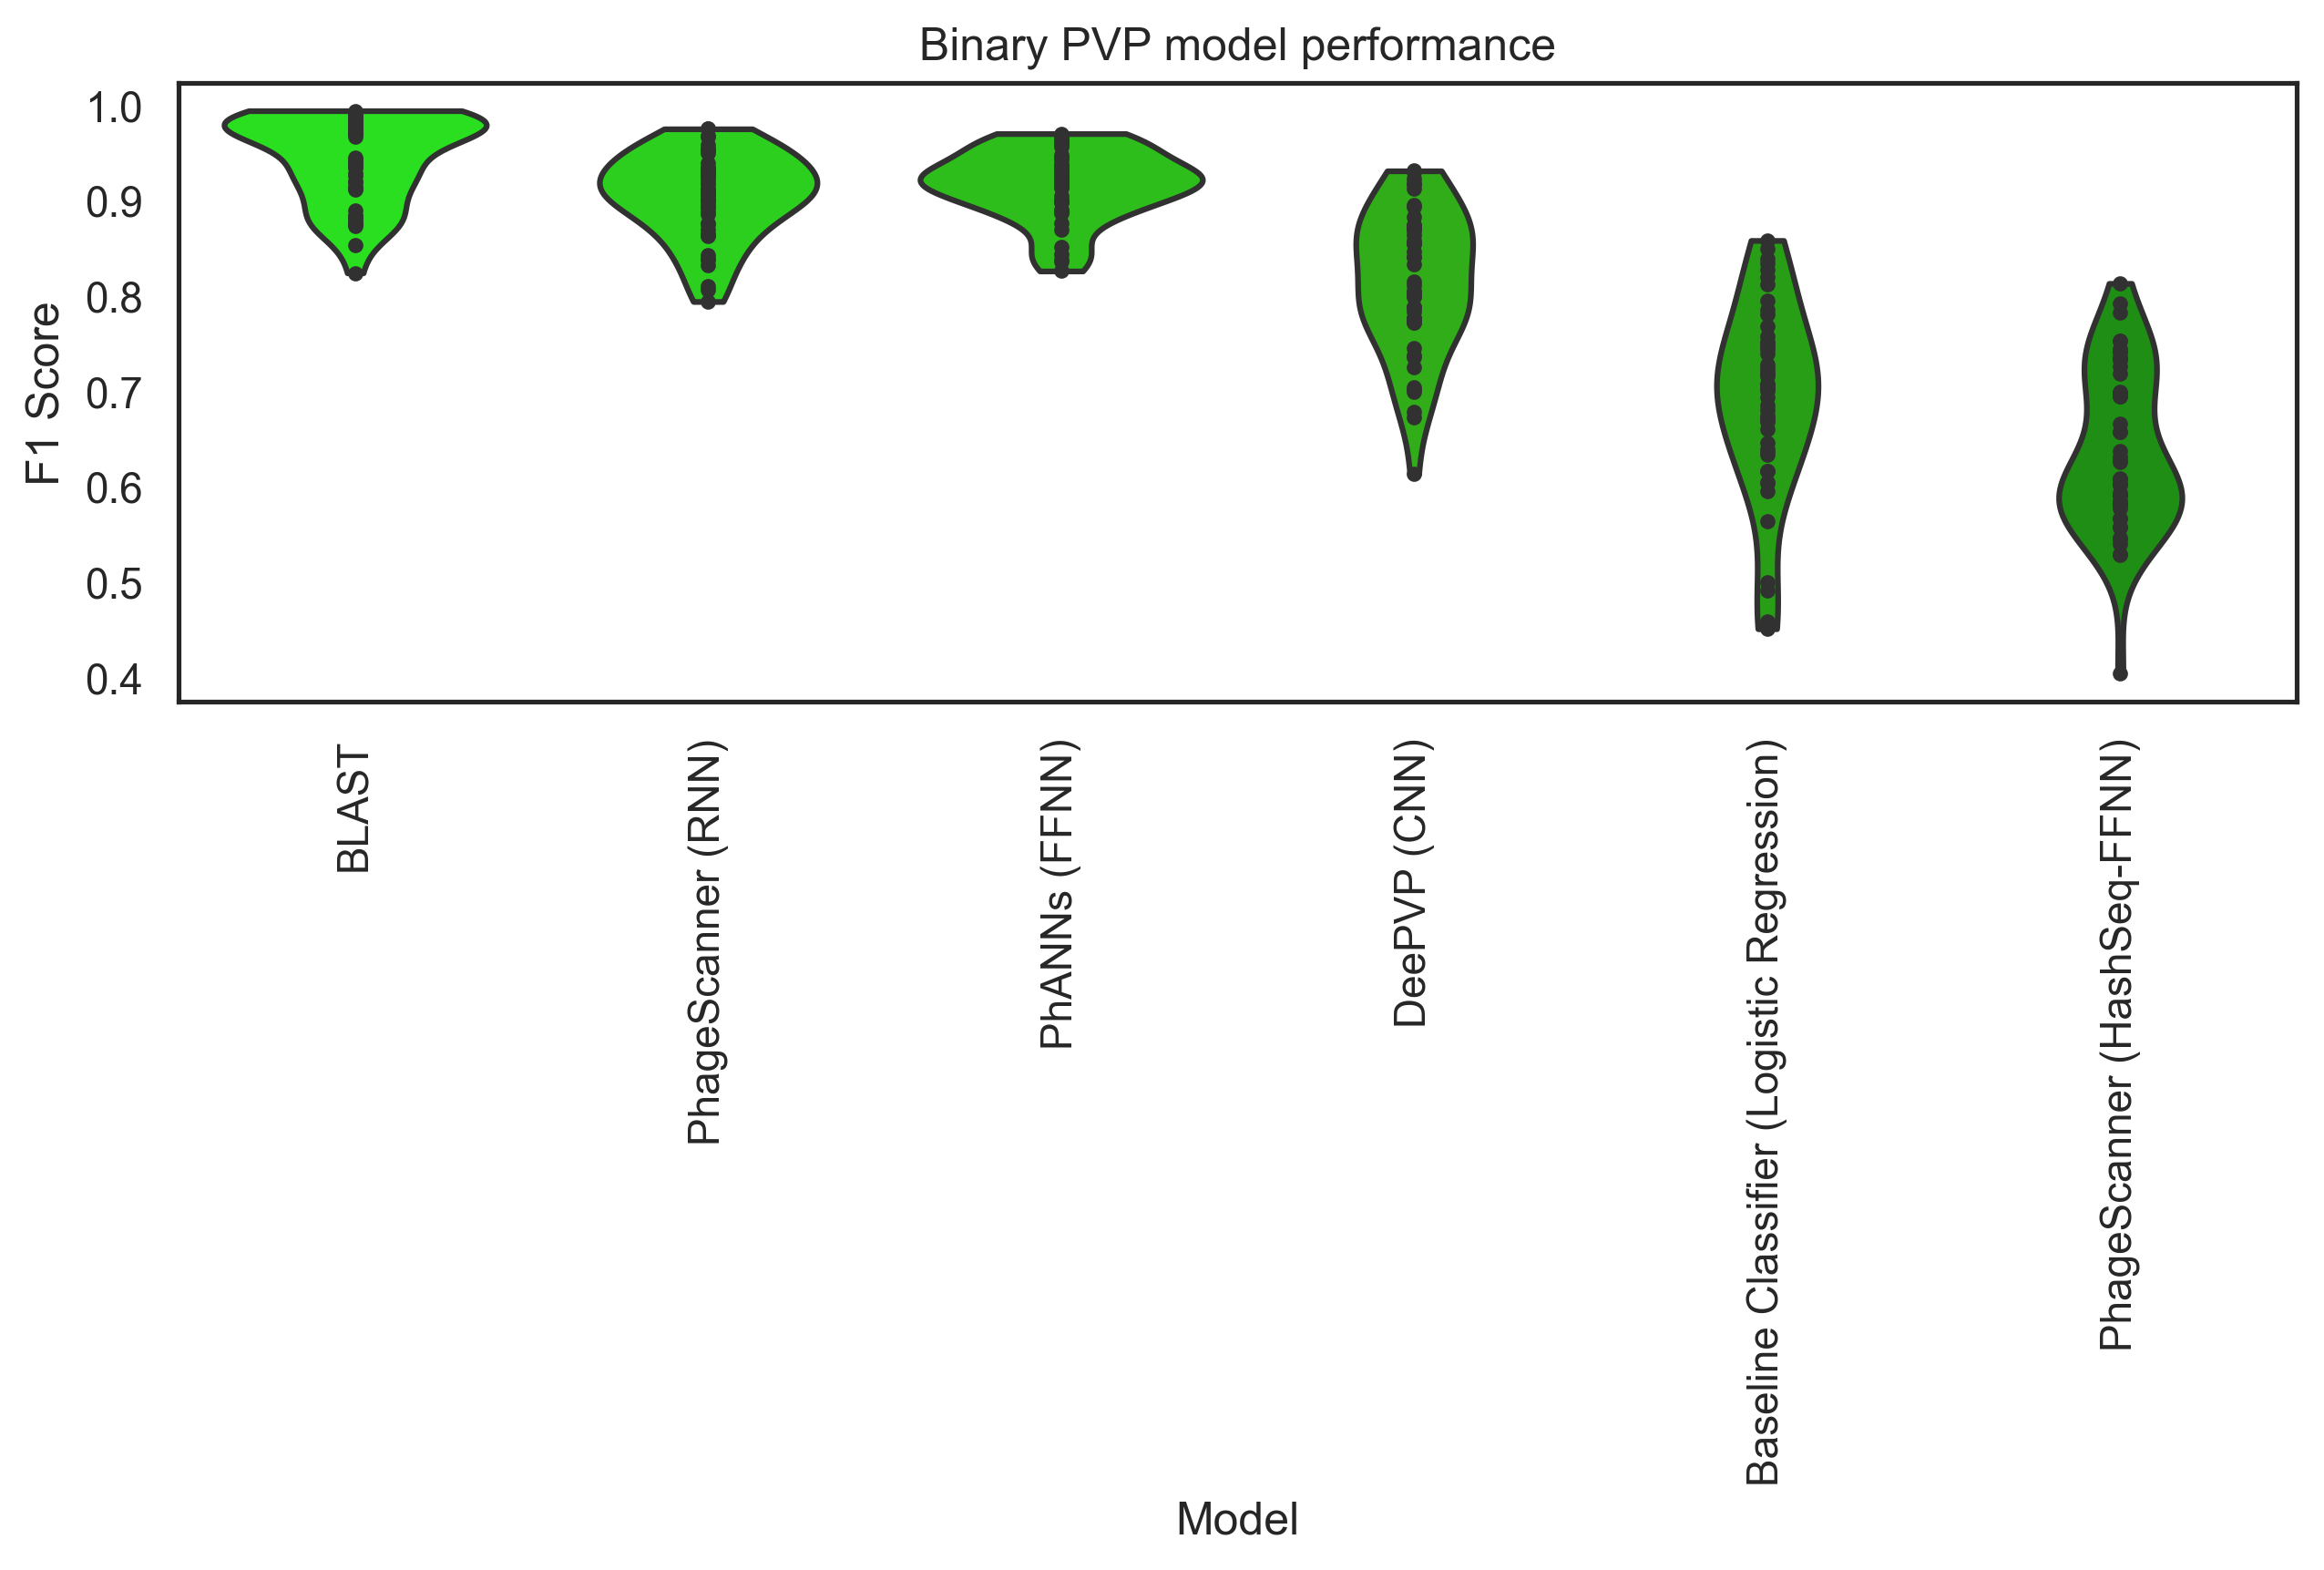

In [521]:
# Plotting
plt.figure(figsize=(10, 3))

# Create barplot
ax = sns.violinplot(data=df_exploded, x="model", y="f1score", cut=0, inner="point", palette=shades_of_green)

plt.title('Binary PVP model performance')
plt.ylabel('F1 Score')
plt.xlabel('Model')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

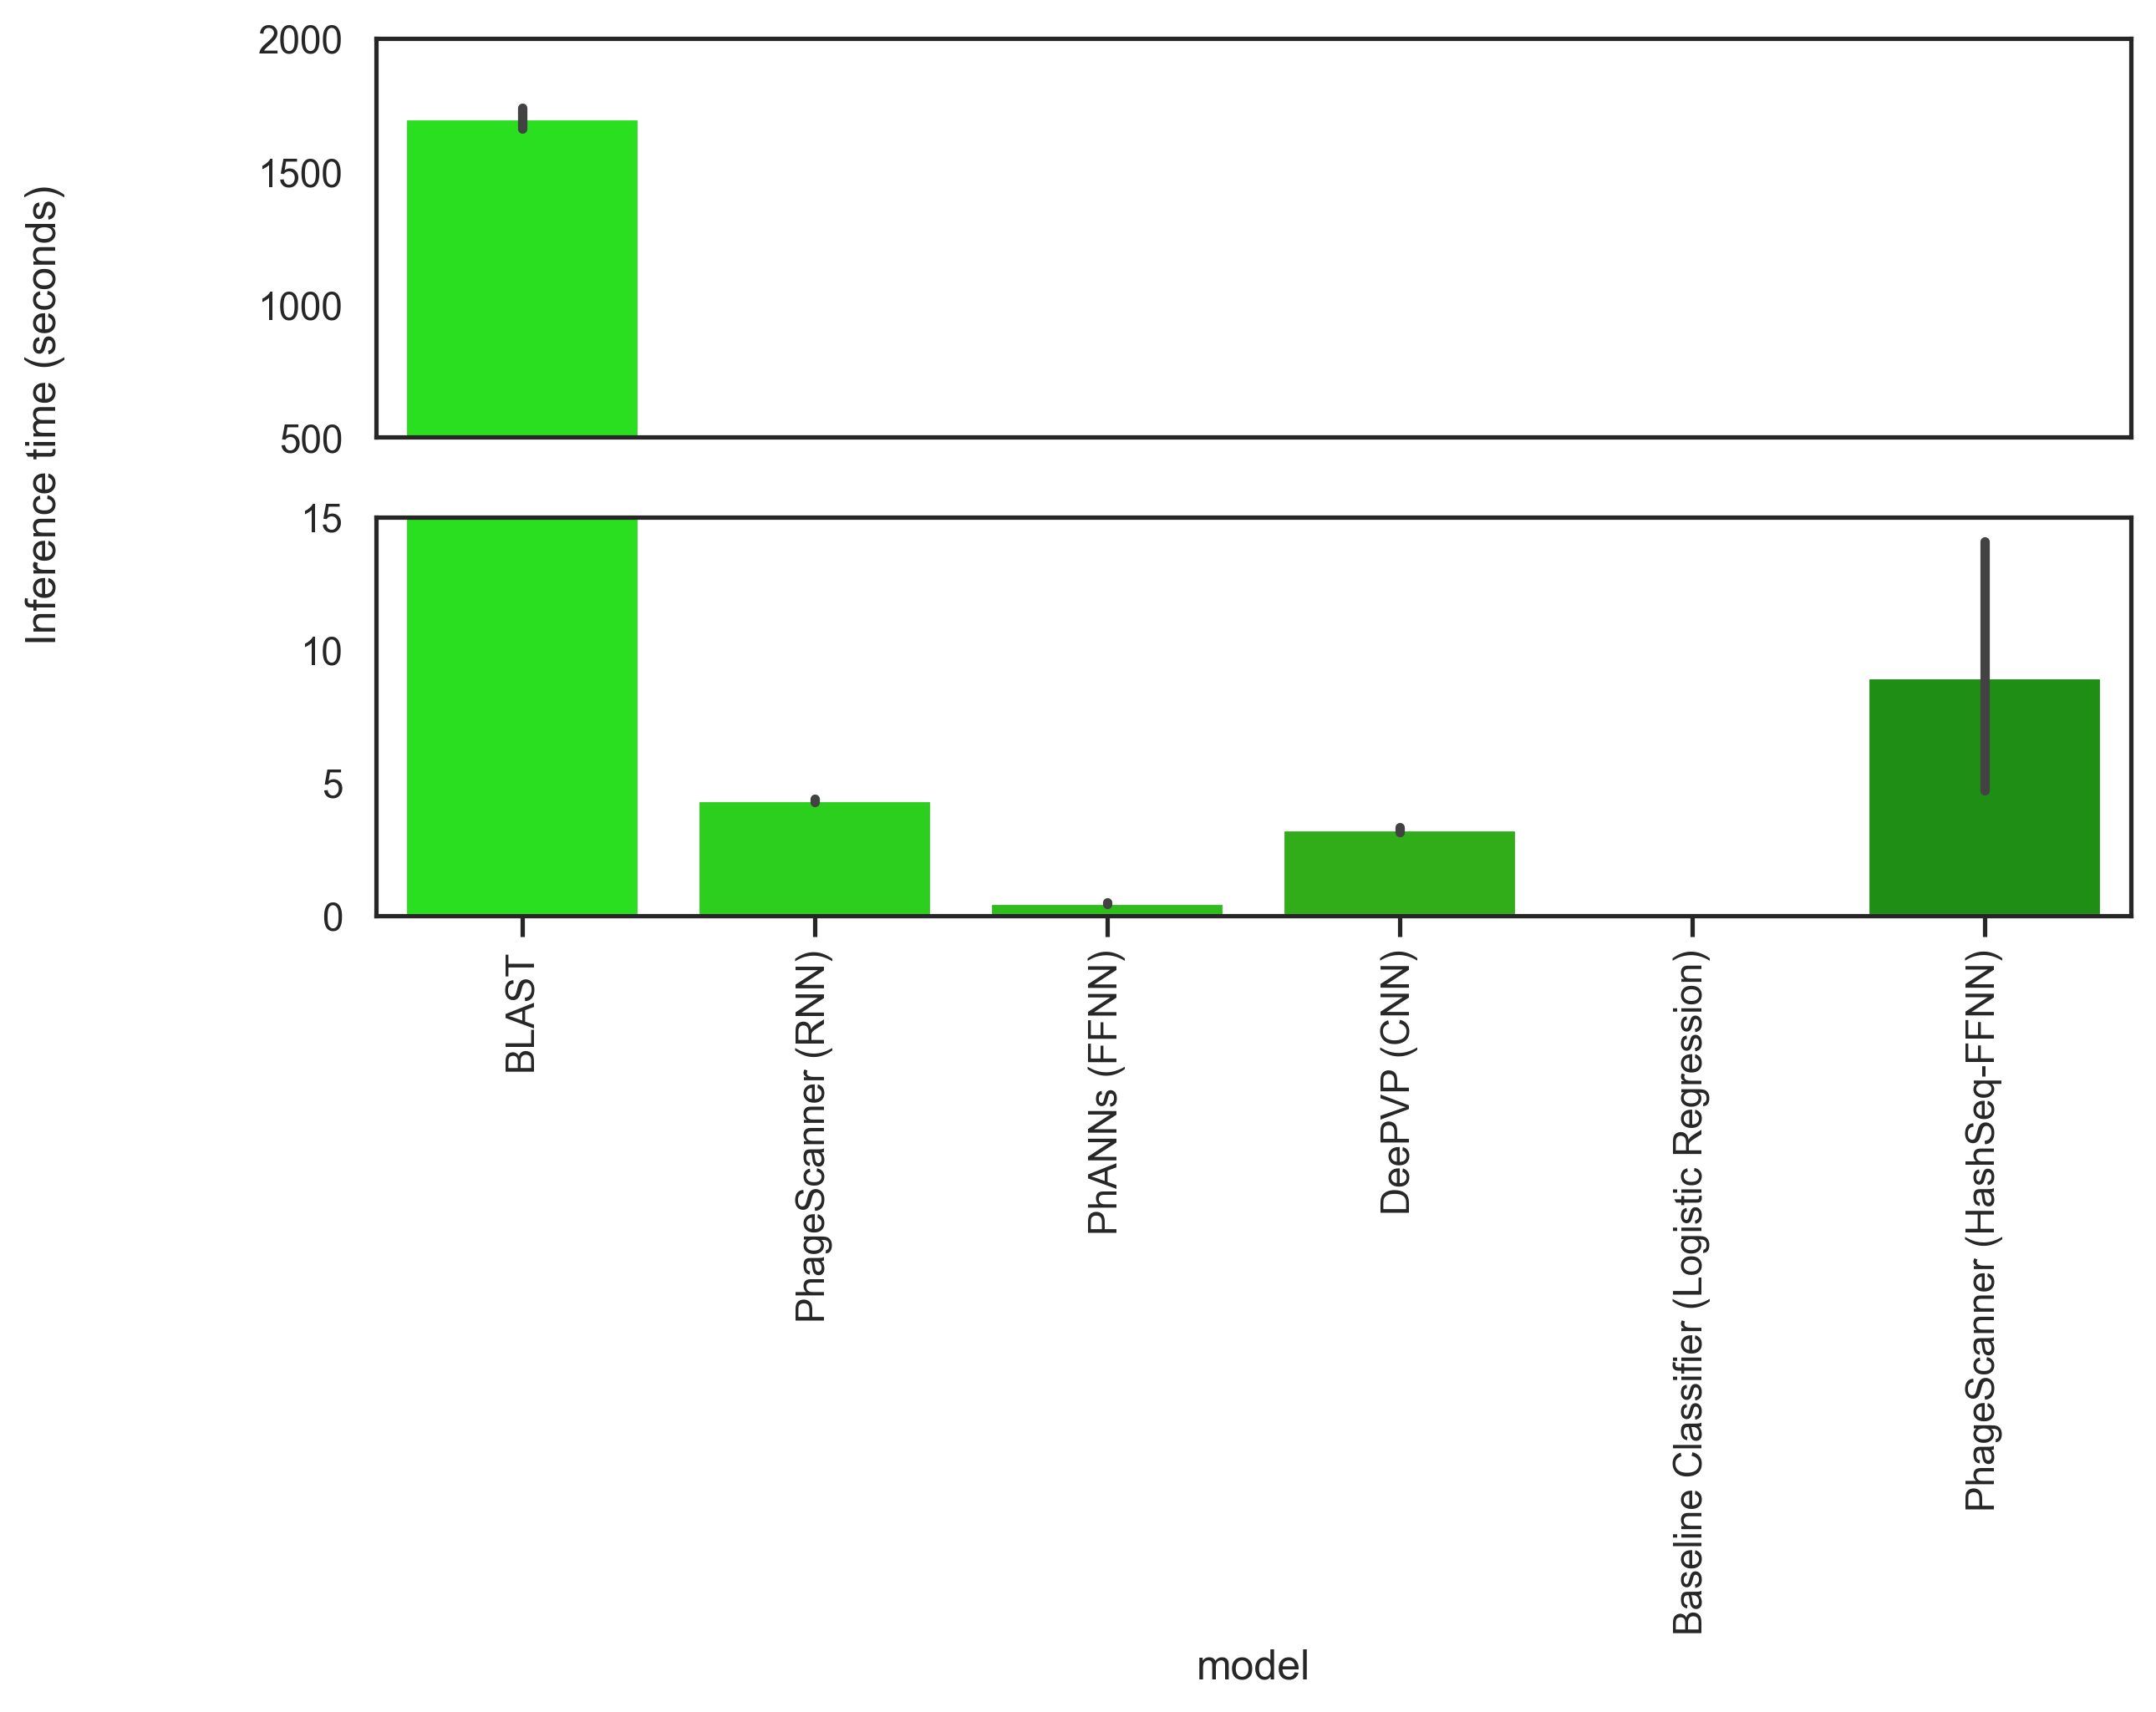

In [523]:

f, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=1, nrows=2, sharex=True)

# df_exploded = df_exploded.sort_values('execution_time_seconds', ascending=False)


# (you could turn this around if you need to, depending on what kind of data you want to show)
ax1 = sns.barplot(data=df_exploded, x="model", y="execution_time_seconds", dodge=False, ax=ax1, palette=shades_of_green)

# we basically do the same thing again for the second plot
ax2 = sns.barplot(data=df_exploded, x="model", y="execution_time_seconds", dodge=False, ax=ax2, palette=shades_of_green)

ax1.set_ylim(500, 2000)
ax2.set_ylim(0, 15)

# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")

# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.01, 0.55, "Inference time (seconds)", va="center", rotation="vertical")


# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax2.xaxis.set_tick_params(rotation=90)

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

plt.show()

# Per class assessment of PhageScanner RNN

In [534]:
# data maniputation - open dataframes
feature_results_df = CSVUtils.csv_to_dataframe(FilePaths.multiclass_result_path)
index2class = CSVUtils.csv_to_dataframe(FilePaths.multiclass_classnames_path)

# select for newest datatime
feature_results_df['datetime'] = pd.to_datetime(feature_results_df['datetime'])
feature_results_df = feature_results_df[feature_results_df['datetime'] == feature_results_df['datetime'].max()]
del feature_results_df['datetime']

# select for PhageScanner model
feature_results_df = feature_results_df[feature_results_df['model'] == 'PhageScanner (RNN)']


# turn tab seperates columns into arrays
feature_results_df['f1score'] = feature_results_df['f1score'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['precision'] = feature_results_df['precision'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['recall'] = feature_results_df['recall'].str.split('\t').apply(lambda x: [float(i) for i in x])
feature_results_df['features'] = feature_results_df['features'].str.replace('\t', "; ")

# create index to class map
del index2class["datetime"]
index2class = {int(k): v[0] for k, v in index2class.items()}

# add classes as a list
feature_results_df['classes'] = [list(index2class.values())]*len(feature_results_df)

# # Flatten the lists
df_exploded = feature_results_df.apply(lambda x: x.explode()).reset_index(drop=True)

# convert to numeric
df_exploded['f1score'] = pd.to_numeric(df_exploded['f1score'])
df_exploded['precision'] = pd.to_numeric(df_exploded['precision'])
df_exploded['recall'] = pd.to_numeric(df_exploded['recall'])

# order by performance
df_exploded = df_exploded.sort_values('f1score', ascending=False)

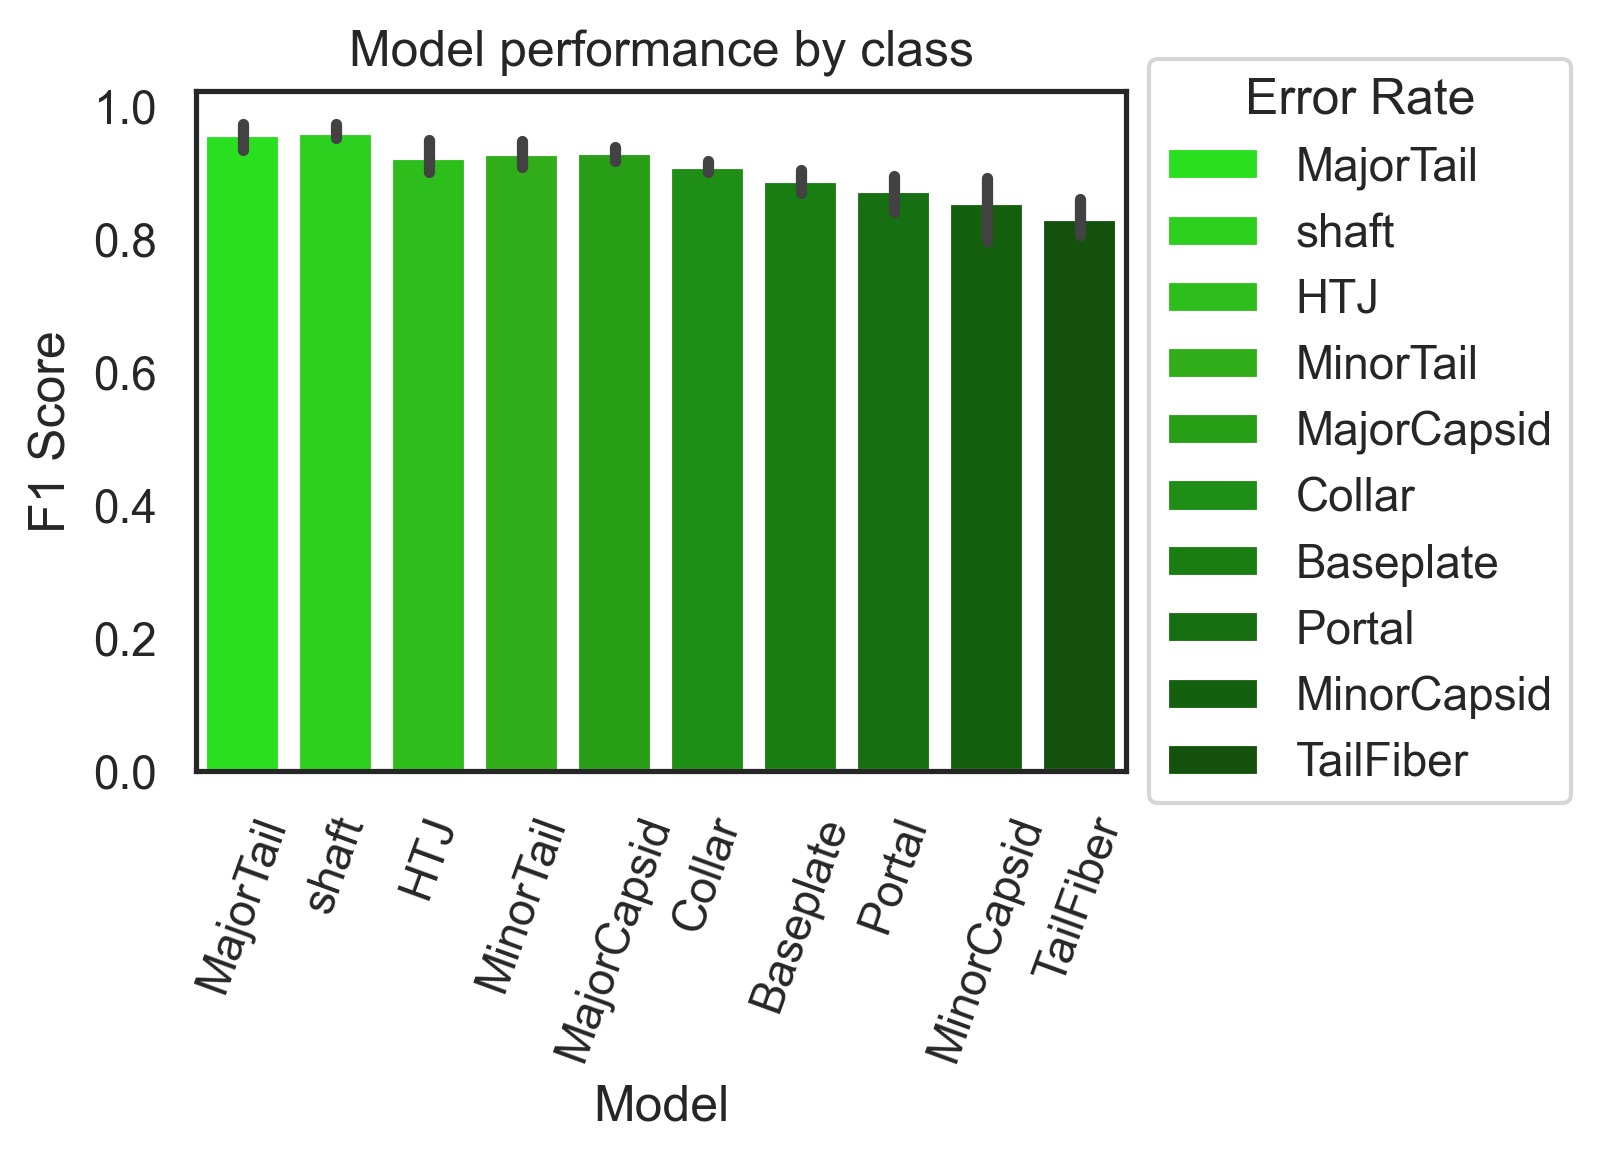

In [540]:
# Plotting
plt.figure(figsize=(4, 3))

# Create barplot
ax = sns.barplot(x='classes', y='f1score', hue='classes', errorbar='pi', data=df_exploded, dodge=False, palette=shades_of_green)

plt.title('Model performance by class')
plt.ylabel('F1 Score')
plt.xlabel('Model')
ax.xaxis.set_tick_params(rotation=70)
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")
plt.show()

In [511]:
# Plot accuracy and time for binary

# Plot cluster size for different thresholds

In [551]:
clustering_results_df = CSVUtils.csv_to_dataframe(FilePaths.clustering_result_path)

# order by inversely by threshold
clustering_results_df = clustering_results_df.sort_values("clustering_threshold", ascending=True)

/var/folders/4f/nzw4pyy13p90pvc1lkbpbjpc0000gn/T/ipykernel_27396/484221285.py:5: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.lineplot(


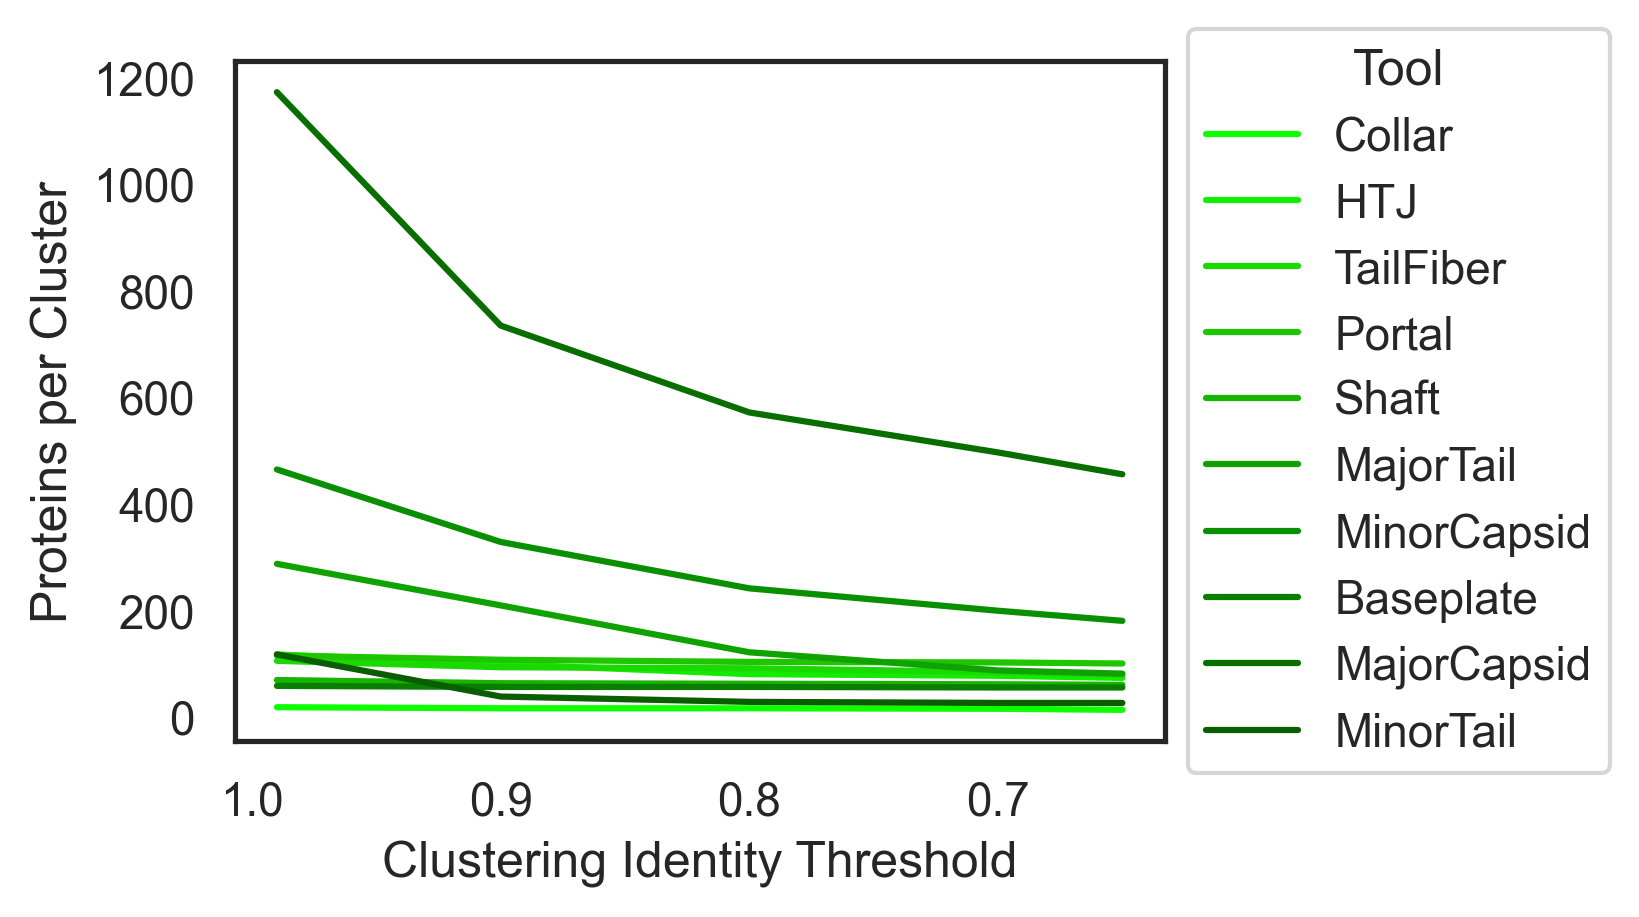

In [559]:
fig, ax1 = plt.subplots(figsize=(4, 3))
ax1.grid(False)

# plot
sns.lineplot(
    data=clustering_results_df,
    x="clustering_threshold", y="cluster_count", hue="class_name",
    markers=True, dashes=False,
    palette= shades_of_green
)

ax1.set_xlabel('Clustering Identity Threshold')
ax1.set_ylabel('Proteins per Cluster')

# Invert x-axis
ax = plt.gca()
ax.invert_xaxis()

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

plt.show()